# Customer Shopping Trends Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import altair as alt

## Data Loading and Preprocessing

In [2]:
df = pd.read_csv("shopping_trends.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [3]:
df['Purchase Amount (USD)'] = df["Purchase Amount (USD)"].astype(float)
df['Purchase Amount (USD)'].dtype

dtype('float64')

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
duplicated_columns = (df['Discount Applied'] == df['Promo Code Used']).all()
print(duplicated_columns)

True


In [6]:
df = df.drop(['Promo Code Used'], axis = 1)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually


In [7]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [8]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

**There are no missing values, and all columns have the correct data types. We can now move on to further analysis.**

## Descriptive Statistics for Numerical Data

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Customers Age

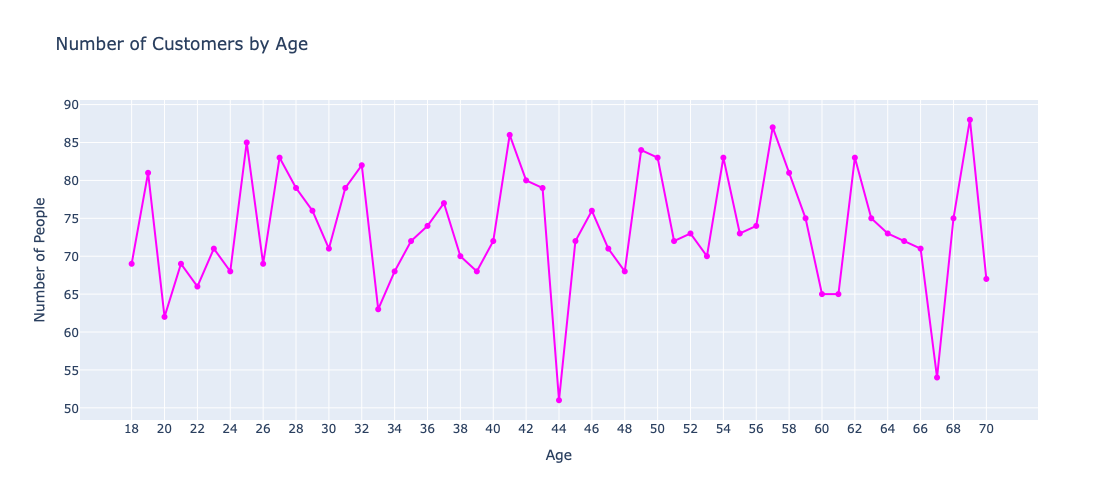

Age range: 18 - 70


In [24]:
minimum = df['Age'].min()
maximum = df['Age'].max()

age_counts = df['Age'].value_counts().sort_index()

fig = go.Figure(
    data=[
        go.Scatter(
            x=age_counts.index,
            y=age_counts.values,
            name="Number of People",
            marker={"color": "magenta"},
            mode="lines+markers"
        )
    ]
)

fig.update_layout(
    title="Number of Customers by Age",
    xaxis_title="Age",
    yaxis_title="Number of People",
    xaxis=dict(tickvals=list(range(minimum, maximum + 2, 2))),
    height=500,
    width=1100
)

fig.show()

print("Age range: " + str(minimum) + " - " + str(maximum))


## Gender

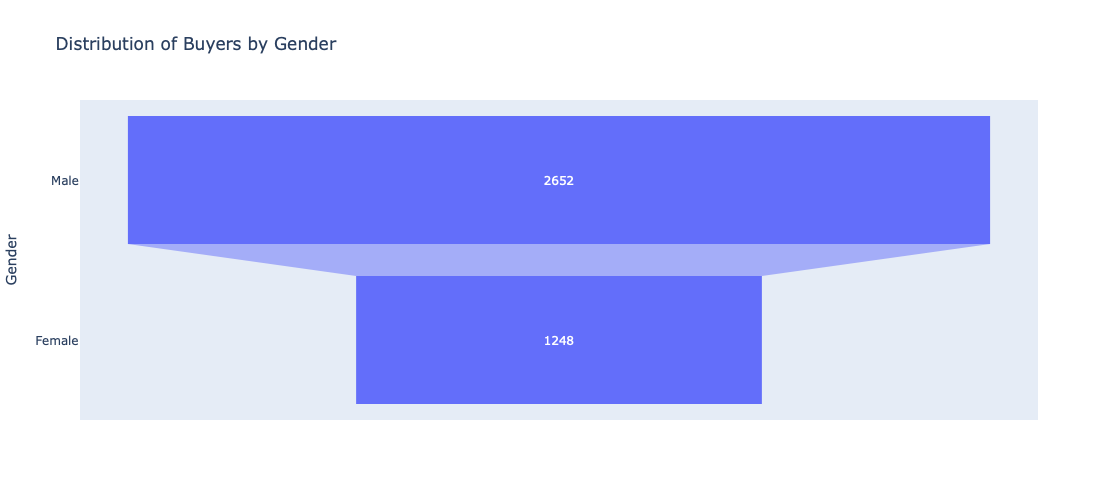

In [23]:
gender_counts = df['Gender'].value_counts()

Fig = px.funnel(
    gender_counts, 
    x=gender_counts.values, 
    y=gender_counts.index, 
    title = 'Distribution of Buyers by Gender',
)
Fig.update_layout(
    width=800,  
    height=500,  
    yaxis_title='Gender',
    
)

Fig.show()

# Product Sales

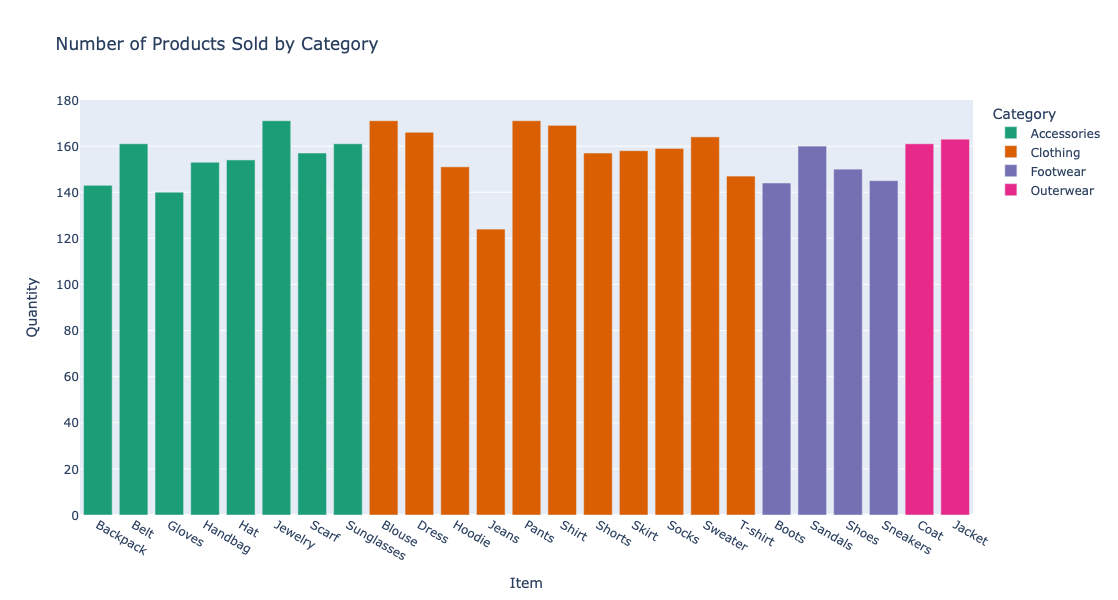

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [12]:
items = df.groupby(['Category', 'Item Purchased']).size().reset_index(name='Count')
sum_category = df['Category'].value_counts()

f = px.bar(
    items,
    x='Item Purchased',
    y='Count',
    color='Category',
    title='Number of Products Sold by Category',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

f.update_layout(
    width=1100,
    height=600,
    xaxis_title='Item',
    yaxis_title='Quantity',
)

f.show()

print(sum_category)


# Revenue by Product

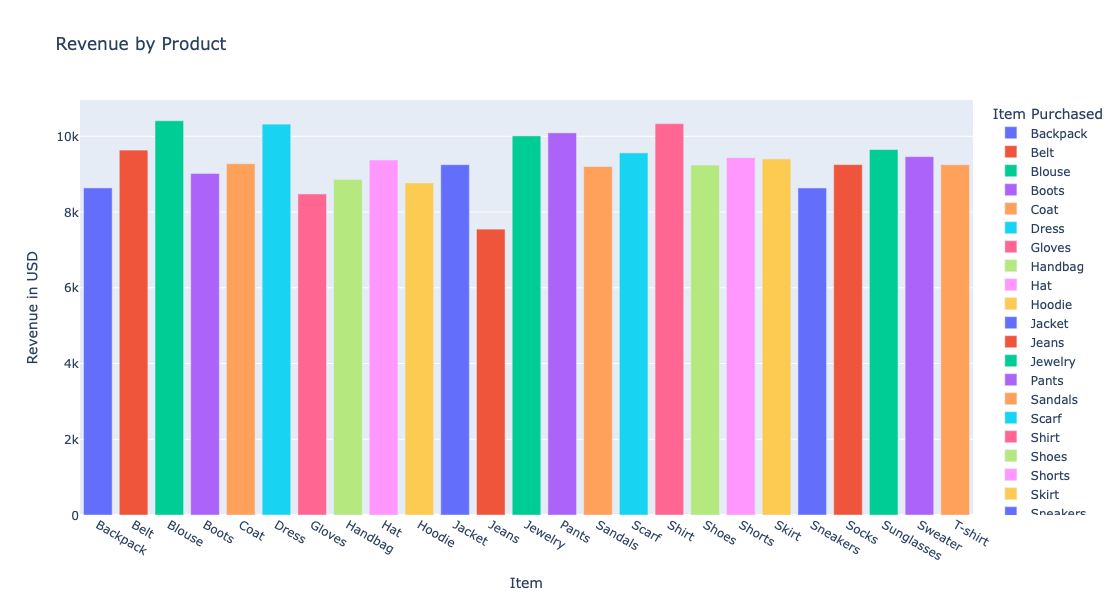

In [13]:
revenue = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
fig = px.bar(
    revenue, 
    x='Item Purchased', 
    y='Purchase Amount (USD)', 
    color='Item Purchased', 
    title='Revenue by Product',
    color_continuous_scale=px.colors.sequential.Sunset
)

fig.update_layout(
    width=1100,  
    height=600,  
    xaxis_title='Item',
    yaxis_title='Revenue in USD',

)
fig.show()

# Product Ratings

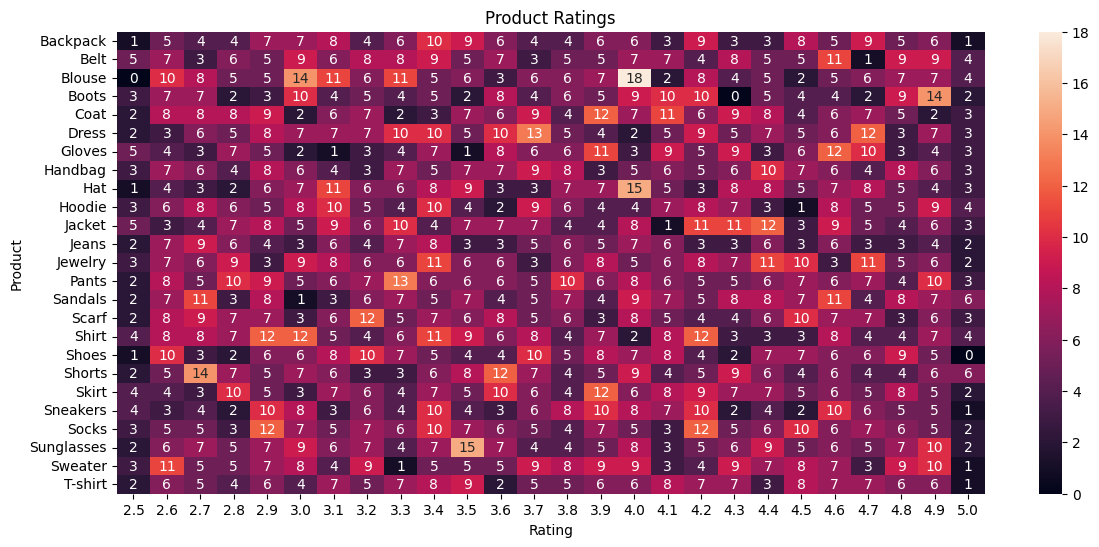

In [14]:
items_rating = df.groupby(['Item Purchased', 'Review Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(items_rating, annot=True, fmt="d", 
            xticklabels=items_rating.columns, 
            yticklabels=items_rating.index)

plt.title('Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Product')
plt.show()


# Analysis of Clothing Sales Based on Size

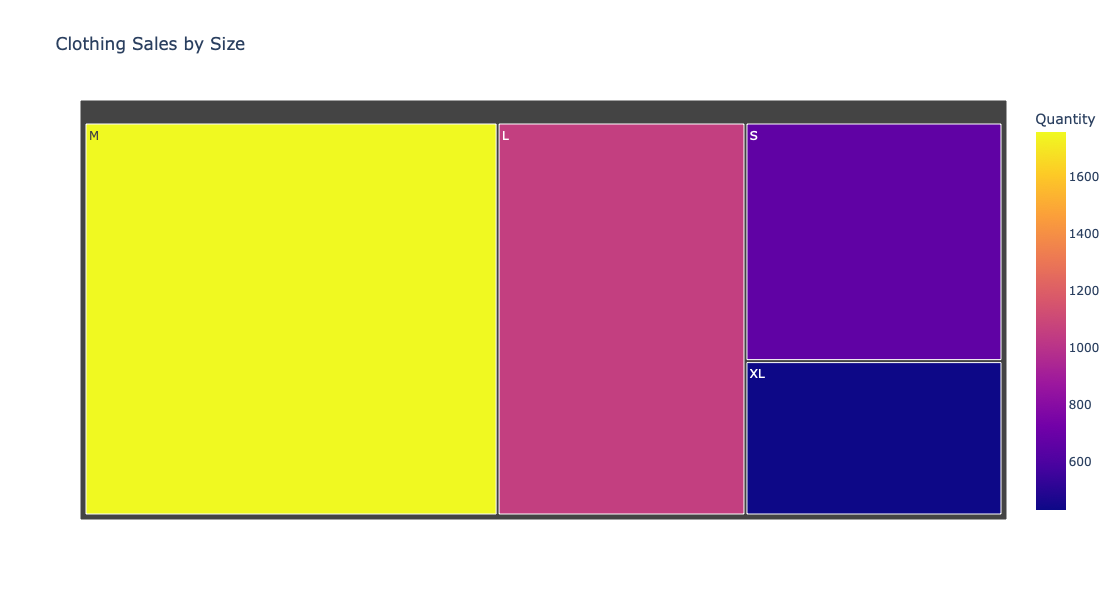

In [15]:
size_counts = df['Size'].value_counts().reset_index(name='Quantity')

fig = px.treemap(
    size_counts, 
    path=['Size'], 
    values='Quantity',  
    title='Clothing Sales by Size',  
    color='Quantity', 
    color_discrete_sequence=px.colors.sequential.Plasma
)

fig.update_layout(
    width=800,  
    height=600
)

fig.show()


# Revenue by Location

In [16]:
us_state = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

location_revenue = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()
location_revenue['State'] = location_revenue['Location'].map(us_state)
location_revenue = location_revenue.drop(columns=['Location'])

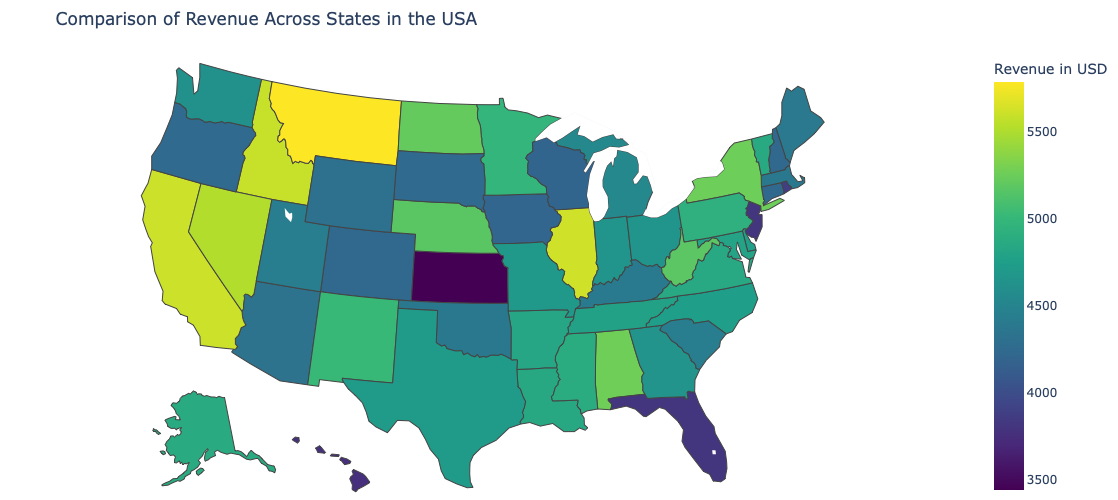

In [17]:
fig = px.choropleth(
    location_revenue, 
    locations='State',         
    locationmode='USA-states', 
    color='Purchase Amount (USD)',             
    scope='usa',               
    color_continuous_scale=px.colors.sequential.Viridis,  
    title='Comparison of Revenue Across States in the USA',
    labels={'State':'State','Purchase Amount (USD)': 'Revenue in USD'}
)

fig.update_layout(
    width=800,  
    height=500,  
    margin={"r":0, "t":50, "l":0, "b":0} 
)
fig.show()


# Payment Methods Used in Purchase Transactions by Customers

In [18]:
payment_method_counts = df['Payment Method'].value_counts(normalize=True).reset_index()
payment_method_counts.columns = ['Payment Method', 'Percentage']
payment_method_counts['Percentage'] *= 100 


base = alt.Chart(payment_method_counts).encode(
    alt.Theta(field="Percentage", type="quantitative", stack=True),  
    alt.Radius(field="Percentage", type="quantitative").scale(type="sqrt", zero=True, rangeMin=20),  
    color=alt.Color(field="Payment Method", type="nominal"),  
)

c1 = base.mark_arc(innerRadius=100, stroke="#fff")

c2 = base.mark_text(radiusOffset=20).encode(
    text=alt.Text(field="Percentage", type="quantitative", format=".2f"),  
)

chart = (c1 + c2).properties(
    title="Payment Method (%)",
    width = 500,
    height = 500,
).configure_mark(
    fontSize=14,
)

chart.show()



alt.LayerChart(...)

## Popularity of Colors in Sales

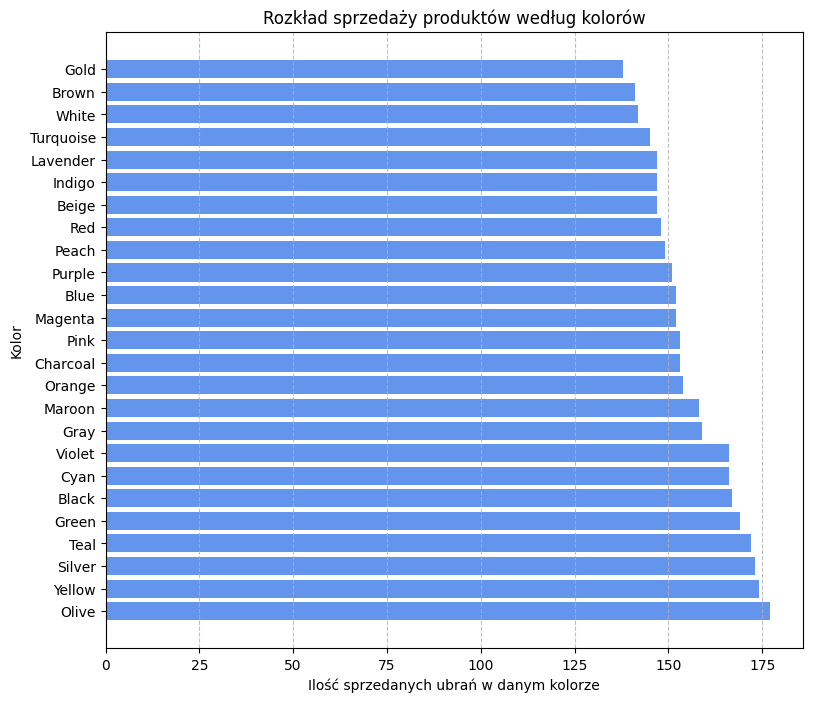

In [19]:
color_counts = df['Color'].value_counts()

plt.figure(figsize=(9,8))
plt.barh(color_counts.index, color_counts.values, color="cornflowerblue")
plt.title("Rozkład sprzedaży produktów według kolorów")
plt.xlabel("Ilość sprzedanych ubrań w danym kolorze")
plt.ylabel("Kolor")

plt.grid(axis="x", alpha=0.8, linestyle="--")

plt.show()

## Subplots

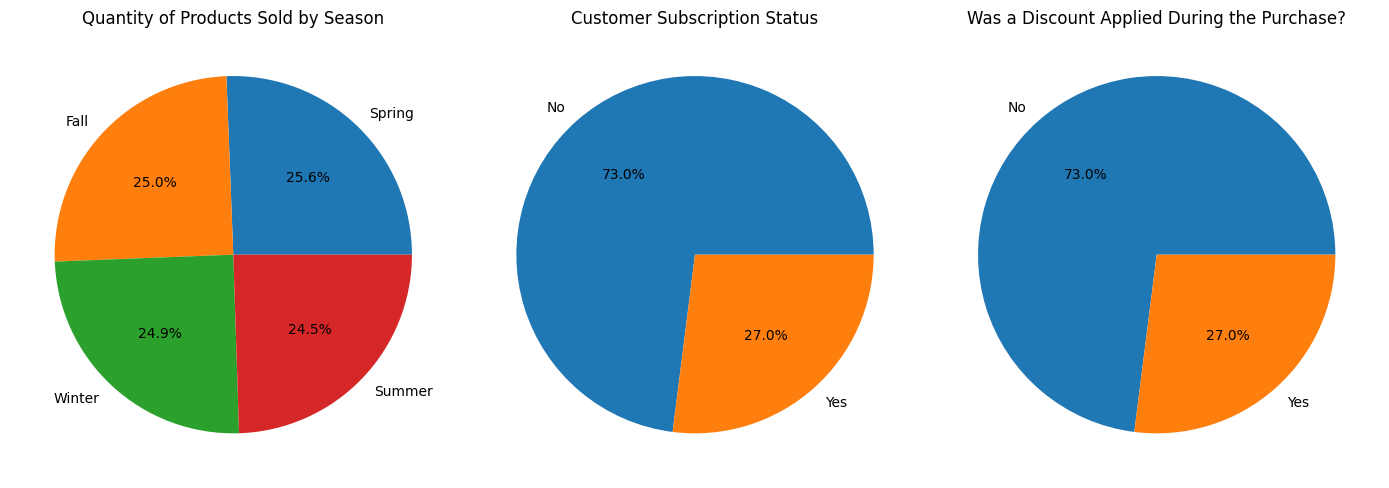

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (14,12))

season_counts = df['Season'].value_counts()
subscription_status_counts = df['Subscription Status'].value_counts()
discount_applied_counts = df['Discount Applied'].value_counts()

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

l1 = season_counts.index
l2 = subscription_status_counts.index
l3 = discount_applied_counts.index

ax1.pie(season_counts.values, labels=l1, autopct='%1.1f%%')
ax1.set_title("Quantity of Products Sold by Season")

ax2.pie(subscription_status_counts.values, labels=l2, autopct='%1.1f%%')
ax2.set_title("Customer Subscription Status")

ax3.pie(subscription_status_counts.values, labels=l3, autopct='%1.1f%%')
ax3.set_title("Was a Discount Applied During the Purchase?")


plt.tight_layout()
plt.show()

## Shipping Type

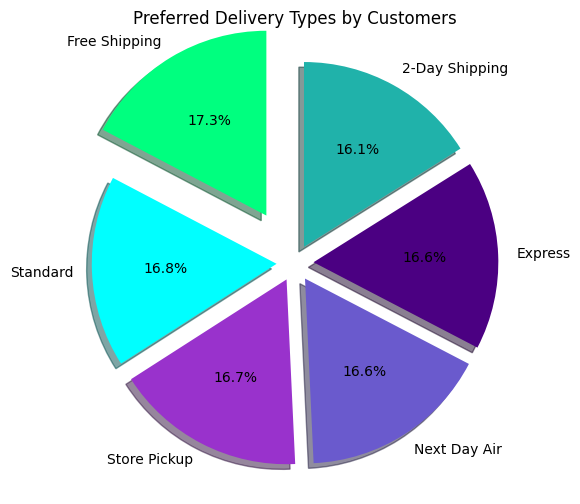

In [21]:
shipping_type_counts = df['Shipping Type'].value_counts()

labels = shipping_type_counts.index
colors = ["springgreen","aqua","darkorchid","slateblue","indigo","lightseagreen"]
explode = (0.3, 0.1, 0.1, 0.1,0.1,0.1)  

plt.figure(figsize=(12, 6)) 
plt.pie(shipping_type_counts.values, labels=labels, autopct='%1.1f%%', colors = colors, explode = explode, shadow=True, startangle=90)
plt.title("Preferred Delivery Types by Customers")
plt.show()

## Purchase Frequency by Gender

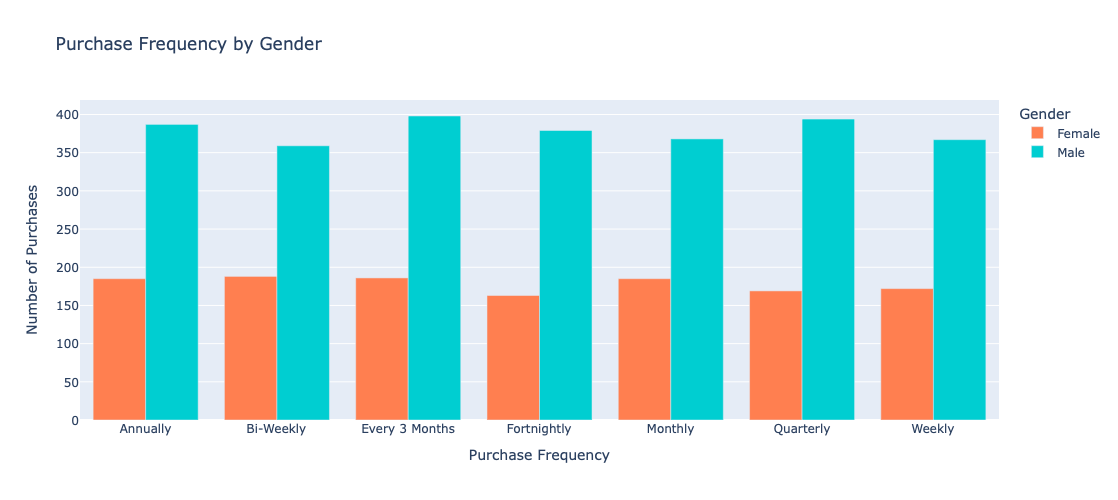

In [22]:
grouped_data = df.groupby(['Frequency of Purchases', 'Gender']).size().reset_index(name='Count')

fig = px.bar(
    grouped_data, 
    x='Frequency of Purchases', 
    y='Count', 
    color='Gender',  
    barmode='group', 
    title='Purchase Frequency by Gender',
    color_discrete_sequence=['#FF7F50', '#00CED1'] 
)

fig.update_layout(
    width=900,  
    height=500,  
    xaxis_title='Purchase Frequency', 
    yaxis_title='Number of Purchases'
)

fig.show()